In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd


In [2]:
# reading the test.csv file
test_data = pd.read_csv('..\data\heart_disease\data_test.csv')

In [6]:
#reading bert.csv from results

bert = pd.read_csv('results/bert.csv')

In [7]:
# separating targets from the test data
test_targets = test_data['num']


              precision    recall  f1-score   support

           0       0.64      0.84      0.73        75
           1       0.86      0.68      0.76       109

    accuracy                           0.74       184
   macro avg       0.75      0.76      0.74       184
weighted avg       0.77      0.74      0.75       184

ROC AUC Score: 0.7594495412844036


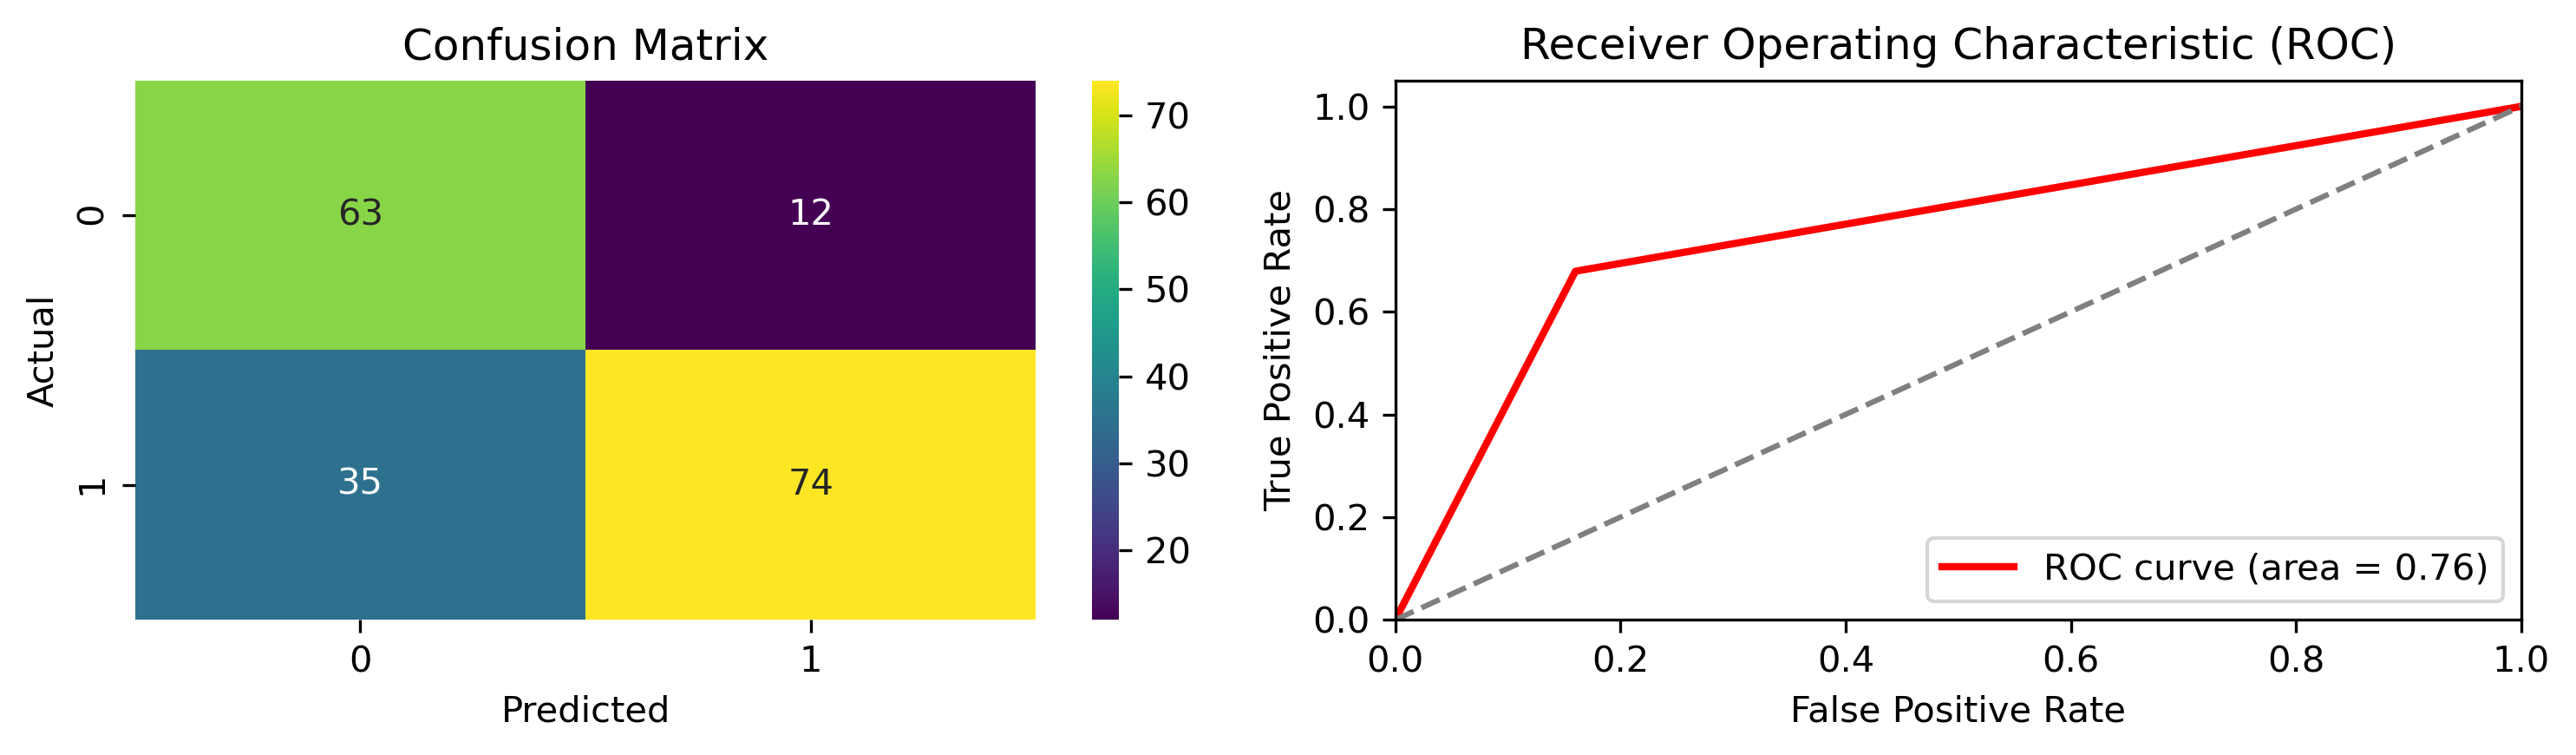

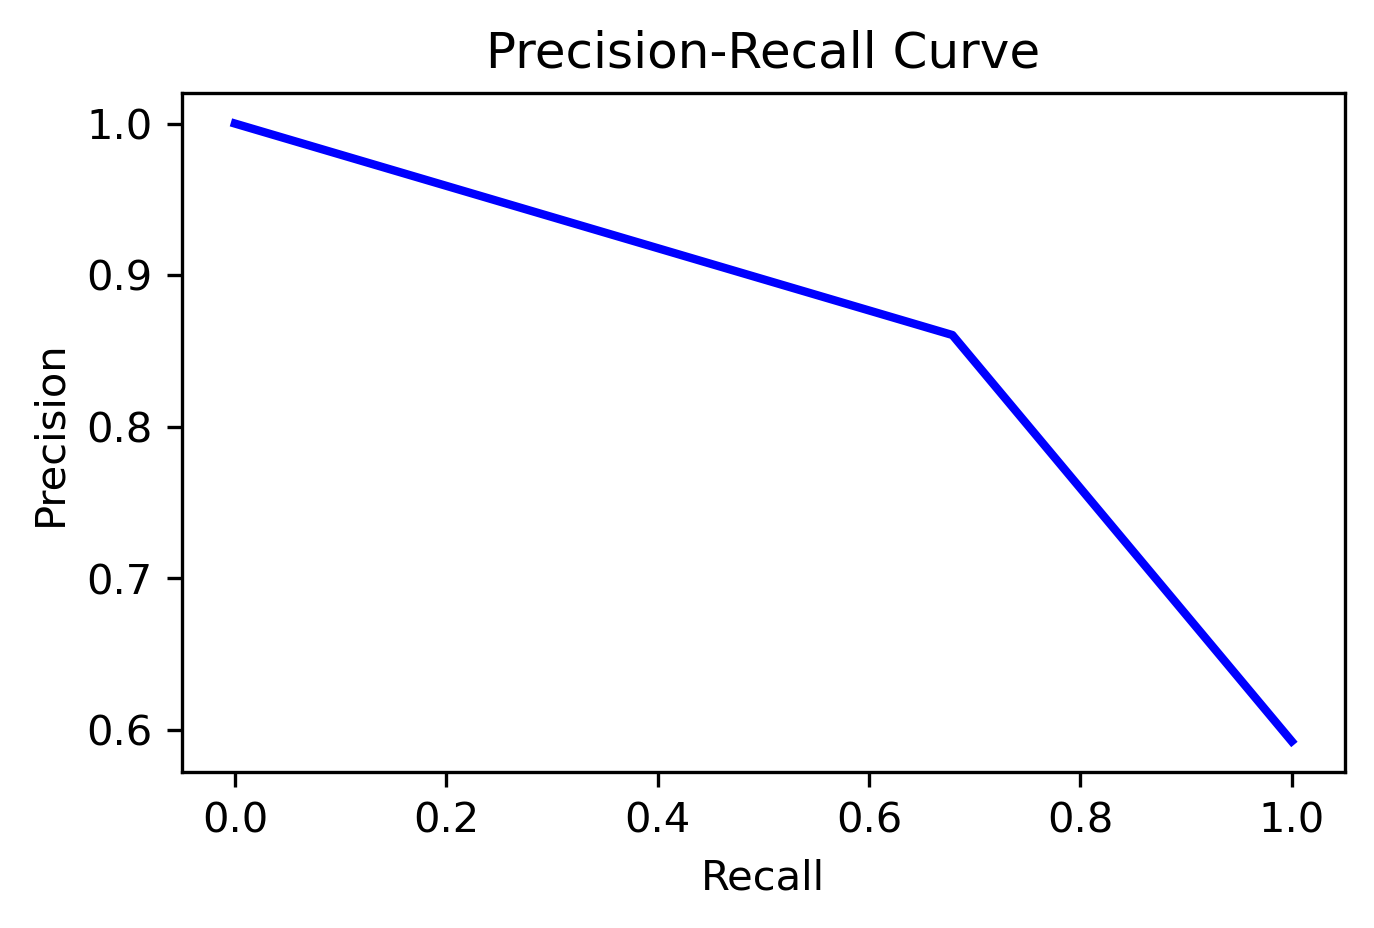

In [10]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Generating the classification report and AUC score from the BERT predictions and the target real
print(classification_report(test_targets, bert))
roc_auc = roc_auc_score(test_targets, bert)
print(f'ROC AUC Score: {roc_auc}')

# Generating the confusion matrix
conf_matrix = confusion_matrix(test_targets, bert)

# Generating the ROC curve
fpr, tpr, _ = roc_curve(test_targets, bert)

# Generating the precision-recall curve
precision, recall, _ = precision_recall_curve(test_targets, bert)

# Plotting the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3), dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Plotting the Precision-Recall Curve
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
